In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x = np.arange(0, 10, 1)
y = np.sin(x)
z = np.cos(x)

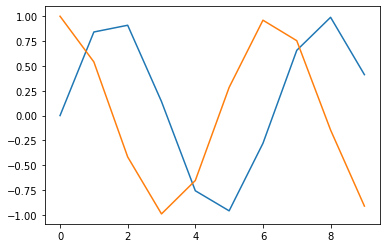

In [22]:
plt.plot(x, y)
plt.plot(x, z)

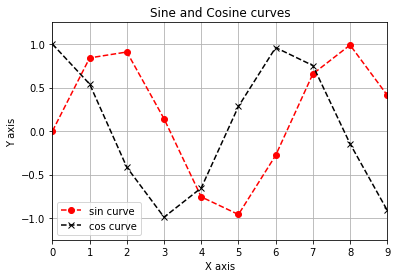

In [30]:
plt.plot(x, y, marker="o", color="r", linestyle="--", label="sin curve")
plt.plot(x, z, marker="x", color="k", linestyle="--", label="cos curve")

plt.xlabel("X axis");
plt.ylabel("Y axis")
plt.legend()

plt.xlim(0,9)
plt.ylim(-1.25, 1.25)

plt.title("Sine and Cosine curves")

plt.grid()


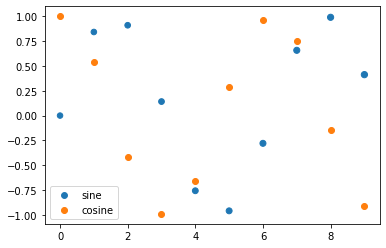

In [38]:
plt.scatter(x, y, label="sine")
plt.scatter(x, z, label="cosine")
plt.legend()

### Matplotlib functions may also be accessed through a lower level interface: axes

The "plt" interface does not allow us as much control over the plot elements. For greater control in more complicated plots, we need the axes interface

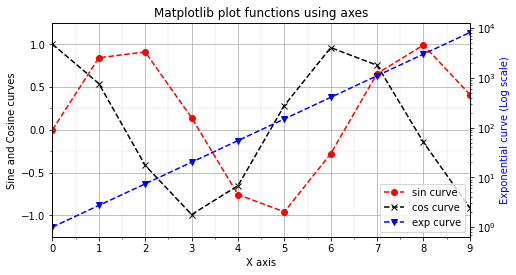

In [49]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()

line1, = ax.plot(x, y, marker="o", color="r", linestyle="--", label="sin curve")
line2, = ax.plot(x, z, marker="x", color="k", linestyle="--", label="cos curve")
#ax.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")
axr = plt.twinx()
line3, = axr.plot(x, np.exp(x), marker="v", color="b", linestyle="--", label="exp curve")

ax.set_xlabel("X axis");
ax.set_ylabel("Sine and Cosine curves")
ax.set_xlim(0,9)
ax.set_ylim(-1.25, 1.25)

ax.set_xticks(np.arange(10))
ax.set_xticks(np.arange(0.5, 9, 1), minor=True)

ax.set_yticks([-0.25, 0, 0.25], minor=True)

axr.set_ylabel("Exponential curve (Log scale)", color="b")
axr.set_yscale("log")
ax.set_title("Matplotlib plot functions using axes")

ax.grid()
ax.grid(which="minor", linestyle="--", linewidth=0.25)
ax.legend([line1, line2, line3], ["sin curve", "cos curve", "exp curve"], loc="lower right")
#plt.legend()

plt.savefig("./sin_cos_exp.jpg", dpi=150, bbox_inches="tight")

An exponential function on a log scale is linear, note the right hand side Y axis having a log scale!

In [119]:
# alternatively, use get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

In [116]:
labels

['sin curve', 'cos curve']

In [31]:
np.std(y)

0.657509486813685

### Errorbars

In [58]:
yerr_for_the_redLine  = np.array([np.arange(0, 1, 0.1), np.arange(1, 2, 0.1)])

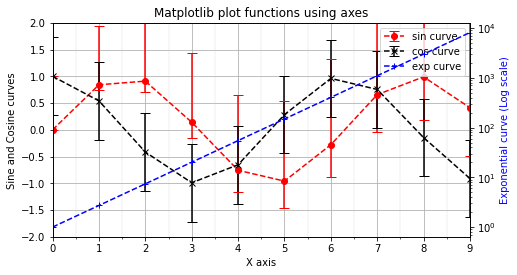

In [59]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()

#line1, = ax.plot(x, y, color="r", linestyle="--", label="sin curve")
line1 = ax.errorbar(x, y, yerr=yerr_for_the_redLine, marker="o", color="r", linestyle="--", label="sin curve", capsize=5)

line2 = ax.errorbar(x, z, yerr=np.std(z), marker="x", color="k", linestyle="--", label="cos curve", capsize=5)
#ax.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")
axr = plt.twinx()
line3, = axr.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")

ax.set_xlabel("X axis");
ax.set_ylabel("Sine and Cosine curves")
ax.set_xlim(0,9)
ax.set_ylim(-2, 2)
ax.set_xticks(np.arange(0.5, 9), minor=True)

axr.set_ylabel("Exponential curve (Log scale)", color="b")
axr.set_yscale("log")
ax.set_title("Matplotlib plot functions using axes")

ax.grid()
ax.grid(which="minor", linestyle="--", linewidth=0.25)
ax.legend([line1, line2, line3], ["sin curve", "cos curve", "exp curve"])

(-2.0, 2.0)

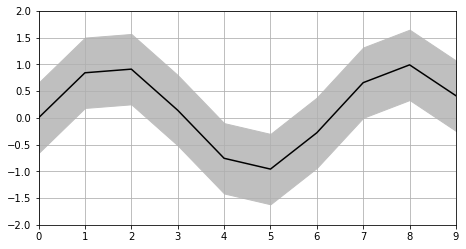

In [66]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()
ax.fill_between(x, y-np.std(y), y+np.std(y), color="0.75")
ax.plot(x, y, color="k")
ax.grid()
ax.set_xlim(0,9)
ax.set_ylim(-2, 2)

## Bar plots

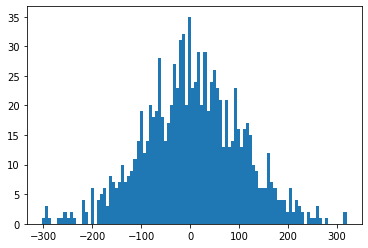

In [69]:
plt.hist(np.random.randn(1000)*100, bins=100);

<BarContainer object of 10 artists>

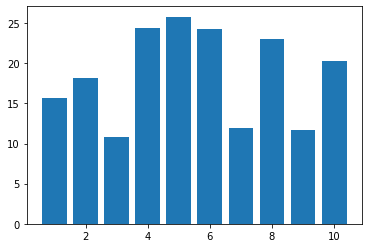

In [32]:
plt.bar(np.arange(1,11), np.random.randn(10)*5+20 )

## Box plots

In [70]:
x = np.array([np.random.randn(1000), np.random.randn(1000)*1.5+1]).T

In [72]:
x.shape

(1000, 2)

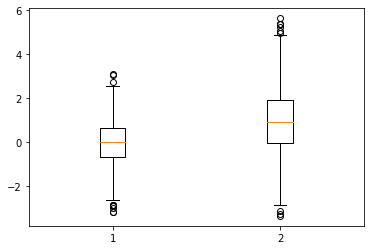

In [73]:
x = np.array([np.random.randn(1000), np.random.randn(1000)*1.5+1]).T
plt.boxplot(x);

The box encloses the Q1 (1st quantile, or the 25th percentile value) to Q3 (3rd quantile, or the 75th percentile value) range. 

In [74]:
np.quantile(x, 0.25), np.quantile(x, 0.75)

(-0.4682074691885657, 1.231180754840211)

The whiskers are drawn at Q1 - 1.5\*IQR and Q3 + 1.5\*IQR, where IQR is the interquantile range. The circles are the outlier values beyond the whiskers. You can customize all these elements of the plot.

In [75]:
Q1 = np.quantile(x, 0.25)
Q3 = np.quantile(x, 0.75)
IQR = Q3 - Q1
print(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

-3.017289805231731 3.780263090883376


## Representing 2 dimensional data using pcolormesh, contour, contourf

In [77]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
x[1] - x[0]

1

In [91]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
xc = x[:-1] + np.diff(x)[0] * 0.5 # center points of X axis

y = np.linspace(-2*np.pi, 2*np.pi, 100)
yc = y[:-1] + np.diff(y)[0] * 0.5 # center points of Y axis

XX, YY = np.meshgrid(xc,yc)

In [87]:
x, xc

(array([-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
         0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531]),
 array([-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361]))

In [88]:
XX

array([[-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361],
       [-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361],
       [-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361],
       [-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361],
       [-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361],
       [-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361],
       [-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361],
       [-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0

In [92]:
Z = np.sin(XX) + np.sin(YY)

In [7]:
Z.shape

(99, 99)

In [94]:
plt.pcolormesh?

Signature:
plt.pcolormesh(
    *args,
    alpha=None,
    norm=None,
    cmap=None,
    vmin=None,
    vmax=None,
    shading=None,
    antialiased=False,
    data=None,
    **kwargs,
)
Docstring:
Create a pseudocolor plot with a non-regular rectangular grid.

Call signature::

    pcolormesh([X, Y,] C, **kwargs)

*X* and *Y* can be used to specify the corners of the quadrilaterals.

.. hint::

   `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
   and preferred in most cases. For a detailed discussion on the
   differences see :ref:`Differences between pcolor() and pcolormesh()
   <differences-pcolor-pcolormesh>`.

Parameters
----------
C : 2D array-like
    The color-mapped values.

X, Y : array-like, optional
    The coordinates of the corners of quadrilaterals of a pcolormesh::

        (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                              +-----+
                              |     |
                              +-----+
        

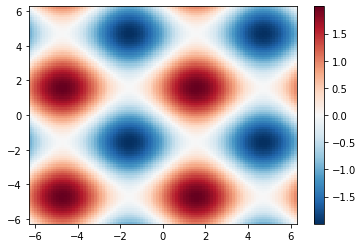

In [99]:
PC = plt.pcolormesh(x, y, Z, cmap="RdBu_r")
plt.colorbar(PC)

In [101]:
plt.contour?

Signature: plt.contour(*args, data=None, **kwargs)
Docstring:
Plot contour lines.

Call signature::

    contour([X, Y,] Z, [levels], **kwargs)

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == M`` is the number of columns in *Z* and
    ``len(Y) == N`` is the number of rows in *Z*.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(M)``, ``Y = range(N)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.

levels : int or array-like, optional
    Determines the number and positions of the contour lines / regions.

    If an int *n*, use `~matplotlib.ticker.MaxNLocator`, w

<a list of 42 text.Text objects>

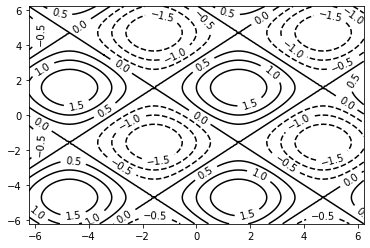

In [104]:
CR = plt.contour(xc, yc, Z, colors="k")
plt.clabel(CR)
#plt.colorbar(CR)

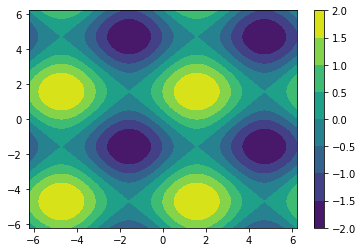

In [13]:
CF = plt.contourf(xc, yc, Z)
plt.colorbar(CF)

In [16]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

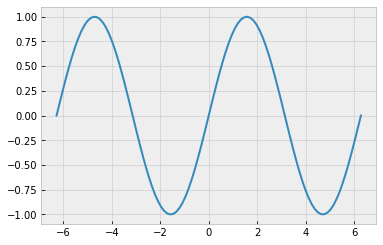

In [105]:
with plt.style.context("bmh"):
    plt.plot(x, np.sin(x))

Try changing the style context and have a look at available styles at the matplotlib gallery: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

## Exercise for Matplotlib

1. Pick two 1D functions of your choice y = f(x), z = g(x)
1. Plot the functions using the plt.plot command, remember to label the functions.
1. Label the X and Y axes of the plot.
1. Set an appropriate title for your plot.
1. Set the X and Y axis limits appropriately.
1. Add errorbars to the plot corresponding to $\pm 1\sigma$, where $\sigma$ is the standard deviation of the function.
1. Set appropriate X and Y ticks, including minor ticks.
1. Call the legend() function to plot the legend.

0.5744562646538028

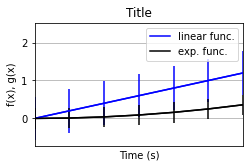

In [130]:
fig = plt.figure(figsize = (190*0.5/25.4, 230*0.25/25.4))
ax = plt.subplot()

x = np.arange(0, 1, 0.1)
y = 2 * x
z = x**2
y_std = np.std(y)
z_std = np.std(z)

ax.plot(x, y, label="linear func.", color="b")
ax.plot(x, z, label = "exp. func.", color="k")

ax.errorbar(x, y, yerr=y_std, color="b")
ax.errorbar(x, z, yerr=z_std, color="k")

plt.title("Title")
plt.xlim(0, 0.6)
#ax.set_xticks(np.arange(0.05, 0.6, 0.1), minor=True)
ax.set_xticks([])

plt.xlabel("Time (s)")
plt.ylabel("f(x), g(x)")

plt.legend()

plt.grid()

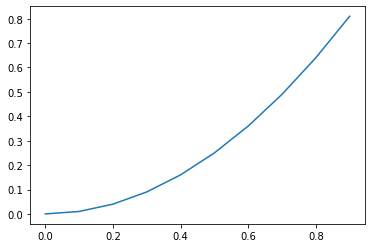

In [114]:
plt.plot(x, z)

<br></br>
### Example using GridSpec for plot layouts

In [109]:
x = np.arange(0,10,0.1)

temp = 2 * x + np.random.randn(x.shape[0])*5

productivity = 0.5 * temp

salinity = np.random.randn(x.shape[0]) * 2.0 + 33

In [106]:
import matplotlib.gridspec as gridspec

In [107]:
gridspec.GridSpec?

Init signature:
gridspec.GridSpec(
    nrows,
    ncols,
    figure=None,
    left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=None,
    hspace=None,
    width_ratios=None,
    height_ratios=None,
)
Docstring:     
A grid layout to place subplots within a figure.

The location of the grid cells is determined in a similar way to
`~.figure.SubplotParams` using *left*, *right*, *top*, *bottom*, *wspace*
and *hspace*.
Init docstring:
Parameters
----------
nrows, ncols : int
    The number of rows and columns of the grid.

figure : `~.figure.Figure`, optional
    Only used for constrained layout to create a proper layoutgrid.

left, right, top, bottom : float, optional
    Extent of the subplots as a fraction of figure width or height.
    Left cannot be larger than right, and bottom cannot be larger than
    top. If not given, the values will be inferred from a figure or
    rcParams at draw time. See also `GridSpec.get_subplot_params`.

wspace : float, optional
    The

Text(0, 0.5, 'PSU')

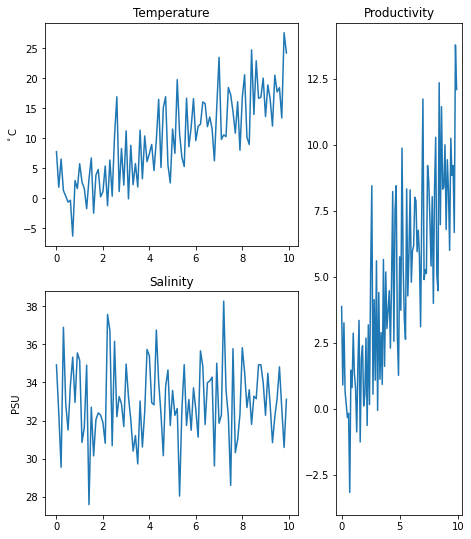

In [110]:
fig = plt.figure(figsize=(190/25.4, 230/25.4))

gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 0.5])

ax1 = plt.subplot(gs[0,0])
ax1.plot(x, temp, label="Temp.")
ax1.set_title("Temperature")
ax1.set_ylabel("$^\circ$C")

ax2 = plt.subplot(gs[:,1])
ax2.plot(x, productivity, label = "productivity")
ax2.set_title("Productivity")

ax3 = plt.subplot(gs[1, 0])
ax3.plot(x, salinity, label="salinity")
ax3.set_title("Salinity")
ax3.set_ylabel("PSU")

In [6]:
?

Init signature:
gridspec.GridSpec(
    nrows,
    ncols,
    figure=None,
    left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=None,
    hspace=None,
    width_ratios=None,
    height_ratios=None,
)
Docstring:     
A grid layout to place subplots within a figure.

The location of the grid cells is determined in a similar way to
`~.figure.SubplotParams` using *left*, *right*, *top*, *bottom*, *wspace*
and *hspace*.
Init docstring:
Parameters
----------
nrows, ncols : int
    The number of rows and columns of the grid.

figure : `~.figure.Figure`, optional
    Only used for constrained layout to create a proper layoutgrid.

left, right, top, bottom : float, optional
    Extent of the subplots as a fraction of figure width or height.
    Left cannot be larger than right, and bottom cannot be larger than
    top. If not given, the values will be inferred from a figure or
    rcParams at draw time. See also `GridSpec.get_subplot_params`.

wspace : float, optional
    The

In [ ]:
gs = gridspec.GridSpec